In [2]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import spearmanr
import numpy as np
from scipy import stats

bs = pd.read_csv('dataset/bountysource_issue.csv')
gc = pd.read_csv('dataset/gitcoin_dataset_5.csv')

In [2]:
bs_filter = bs[['I_B_total_value', 'I_content_len_before', 'I_cmnt_cnt_before', 'Label']].copy()
bs_filter.rename(columns={"I_B_total_value": "Value", "I_content_len_before": "description_length", "I_cmnt_cnt_before": "github_comments"},inplace=True)
bs_filter['source'] = 'gitcoin'
bs_filter.dropna(inplace=True)

gc_filter = gc[['status','value_in_usdt', 'description_length', 'github_comments']].copy()
gc_filter.rename(columns={"value_in_usdt": "Value", "status": 'Label'},inplace=True)
gc_filter['Label'] = np.where(gc_filter['Label']=='done', 'success', 'failure')
gc_filter['source'] = 'bounty_source'
gc_filter.dropna(inplace=True)

combine = bs_filter.append(gc_filter, ignore_index=True)
combine_success = combine[combine['Label'] == 'success']


In [3]:
# ## overall case
# axes = combine.boxplot(column='Value', vert = 0, figsize=(10,5), by='source', showfliers=False)
# axes.title.set_text('Value success and failure')

# ## success case
# combine = combine[combine['Label'] == 'success']
# axes = combine.boxplot(column='Value', vert = 0, figsize=(10,5), by='source', showfliers=False)
# axes.title.set_text('Value success')

## check normalization

# combine = combine[combine['Label'] == 'success']
for keyword in ['Value', 'description_length', 'github_comments']:

    print(keyword)

    print(stats.shapiro(gc_filter[keyword].values))
    # print(scipy.stats.normaltest(gc_filter[keyword].values))
    # print(len(gc_filter[keyword].values))

    print(stats.shapiro(bs_filter[keyword].values))
    # print(scipy.stats.normaltest(bs_filter[keyword].values))
    # print(len(bs_filter[keyword].values))

    print(scipy.stats.mannwhitneyu(gc_filter[keyword], bs_filter[keyword]))
    # print(stats.shapiro(combine[keyword].notnull().values))
    # print(scipy.stats.normaltest(combine[keyword].values))
    # print(len(combine[keyword].notnull().values))

## p-value annotation legend:
##      ns: p <= 1.00e+00
##       *: 1.00e-02 < p <= 5.00e-02
##      **: 1.00e-03 < p <= 1.00e-02
##     ***: 1.00e-04 < p <= 1.00e-03
##    ****: p <= 1.00e-04




Value
ShapiroResult(statistic=0.008724570274353027, pvalue=0.0)
ShapiroResult(statistic=0.1839807629585266, pvalue=0.0)
MannwhitneyuResult(statistic=9232886.0, pvalue=4.534909606053198e-238)
description_length
ShapiroResult(statistic=0.7351303100585938, pvalue=0.0)
ShapiroResult(statistic=0.2739163637161255, pvalue=0.0)
MannwhitneyuResult(statistic=8309996.5, pvalue=1.7207489788202393e-111)
github_comments
ShapiroResult(statistic=0.7053467035293579, pvalue=0.0)
ShapiroResult(statistic=0.534682035446167, pvalue=0.0)
MannwhitneyuResult(statistic=7958292.5, pvalue=2.5863230280919896e-78)


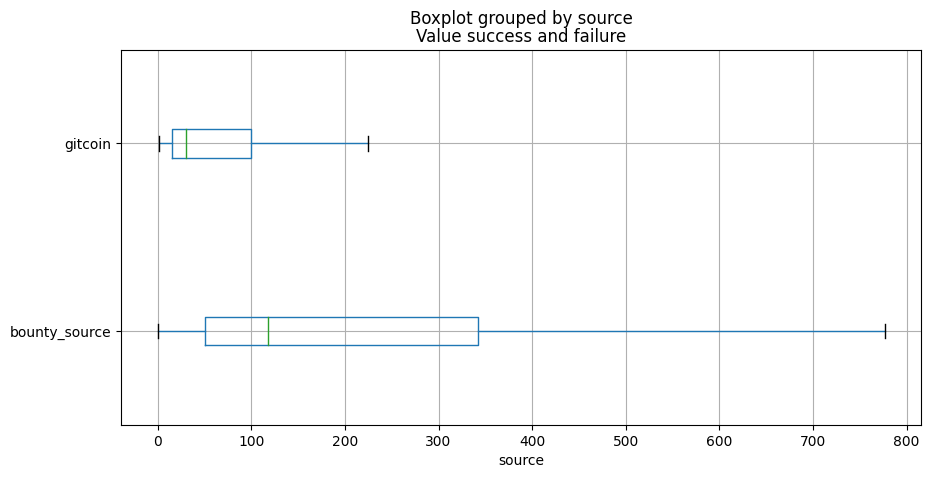

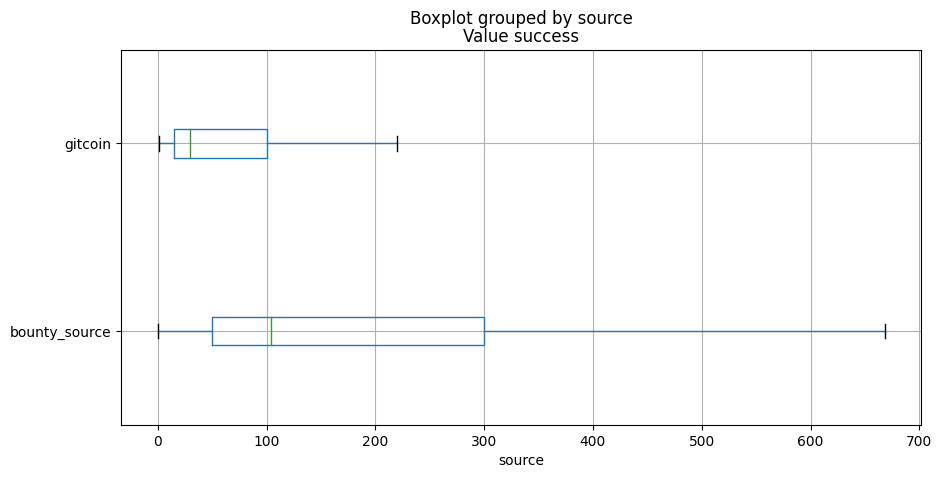

In [4]:
## overall case
axes = combine.boxplot(column='Value', vert = 0, figsize=(10,5), by='source', showfliers=False)
axes.title.set_text('Value success and failure')

## success case
axes = combine_success.boxplot(column='Value', vert = 0, figsize=(10,5), by='source', showfliers=False)
axes.title.set_text('Value success')


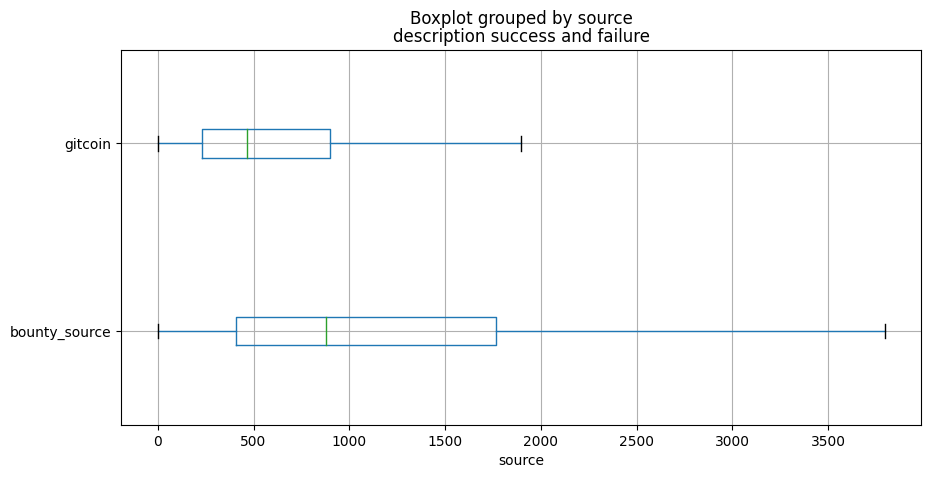

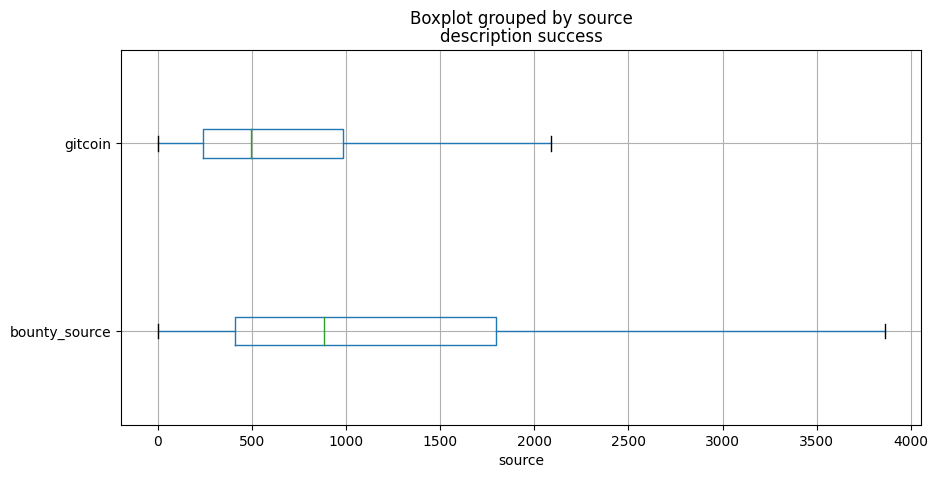

In [5]:
## overall case
axes = combine.boxplot(column='description_length', vert = 0, figsize=(10,5), by='source', showfliers=False)
axes.title.set_text('description success and failure')

## success case
axes = combine_success.boxplot(column='description_length', vert = 0, figsize=(10,5), by='source', showfliers=False)
axes.title.set_text('description success')


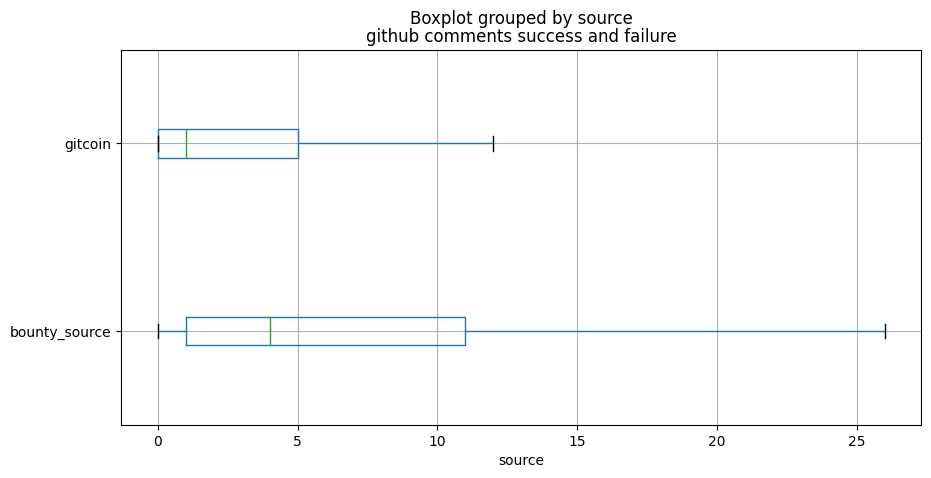

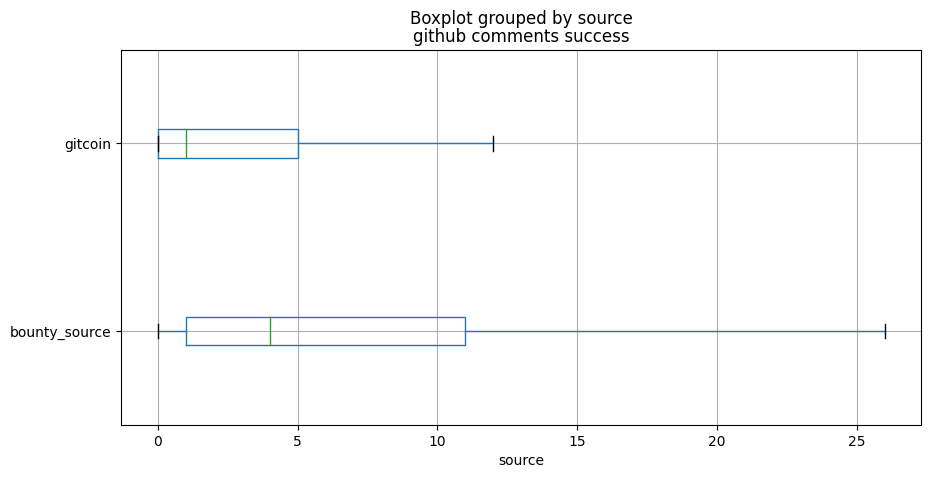

In [6]:
## overall case
axes = combine.boxplot(column='github_comments', vert = 0, figsize=(10,5), by='source', showfliers=False)
axes.title.set_text('github comments success and failure')

## success case
axes = combine_success.boxplot(column='github_comments', vert = 0, figsize=(10,5), by='source', showfliers=False)
axes.title.set_text('github comments success')


In [7]:
# Get the frequency, PDF and CDF for each value in the series

# Define your series
s = pd.Series([9, 5, 3, 5, 5, 4, 6, 5, 5, 8, 7], name = 'value')
df = pd.DataFrame(s)

# Frequency
stats_bs = bs_filter[bs_filter['Label'] == 'success'].groupby('Value')['Value'].agg('count').pipe(pd.DataFrame).rename(columns = {'Value': 'frequency'})
stats_gc = gc_filter[gc_filter['Label'] == 'success'].groupby('Value')['Value'].agg('count').pipe(pd.DataFrame).rename(columns = {'Value': 'frequency'})
stats_df = df.groupby('value')['value'].agg('count').pipe(pd.DataFrame).rename(columns = {'value': 'frequency'})

# PDF
stats_bs['pdf'] = stats_bs['frequency'] / sum(stats_bs['frequency'])
stats_gc['pdf'] = stats_gc['frequency'] / sum(stats_gc['frequency'])




In [8]:
# CDF
stats_bs['cdf'] = stats_bs['pdf'].cumsum()
stats_bs = stats_bs.reset_index()

stats_gc['cdf'] = stats_gc['pdf'].cumsum()
stats_gc = stats_gc.reset_index()

Text(0, 0.5, 'Cumulative distribution')

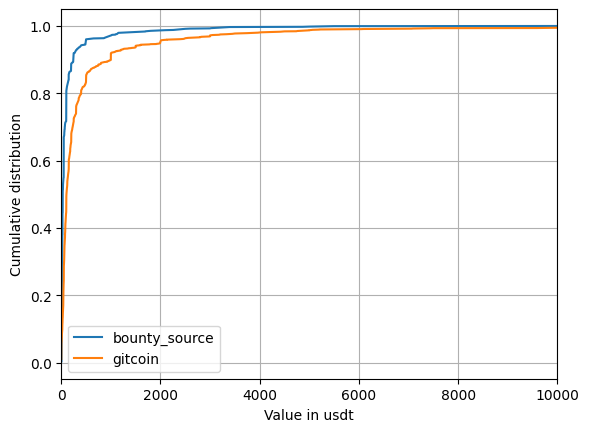

In [10]:
ax = stats_bs.plot(x = 'Value', y = ['cdf'], grid = True, xlim=[0,10000])
stats_gc.plot(ax=ax, x = 'Value', y = ['cdf'], grid = True, xlim=[0,10000])

ax.legend(["bounty_source", "gitcoin"])
ax.set_xlabel('Value in usdt')
ax.set_ylabel('Cumulative distribution')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c7dbb46d-be11-4d98-a8ae-f659e78e24c4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>